<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day30_Multi_modal_AI_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Key Concepts to Cover**

**Multi-modal integration:** Combining different AI techniques (text processing, image analysis, structured data)

**Assistant design:** Creating a cohesive user experience that handles different types of inputs

**Integration of previous skills:** Applying what you've learned in previous days

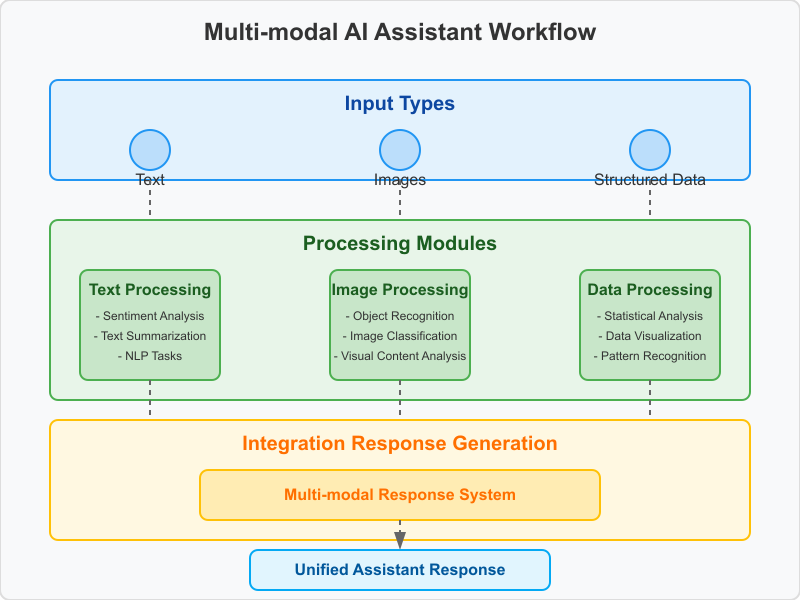

**We'll create a simple tool that can handle different types of data.**

Imagine a basic assistant where you can either type a question, upload an image, or provide some data in a table. Your assistant will recognize what type of input it received and respond appropriately - answering text questions using NLP, describing images using computer vision techniques, or analyzing data with statistical methods.

**For example**, if you ask "How's the weather?" it gives a text response, if you upload a photo of a dog, it says "I see a dog," and if you provide sales data, it might calculate "Your average sales are $5,000." The project combines skills from throughout your 30-day journey into one integrated tool.

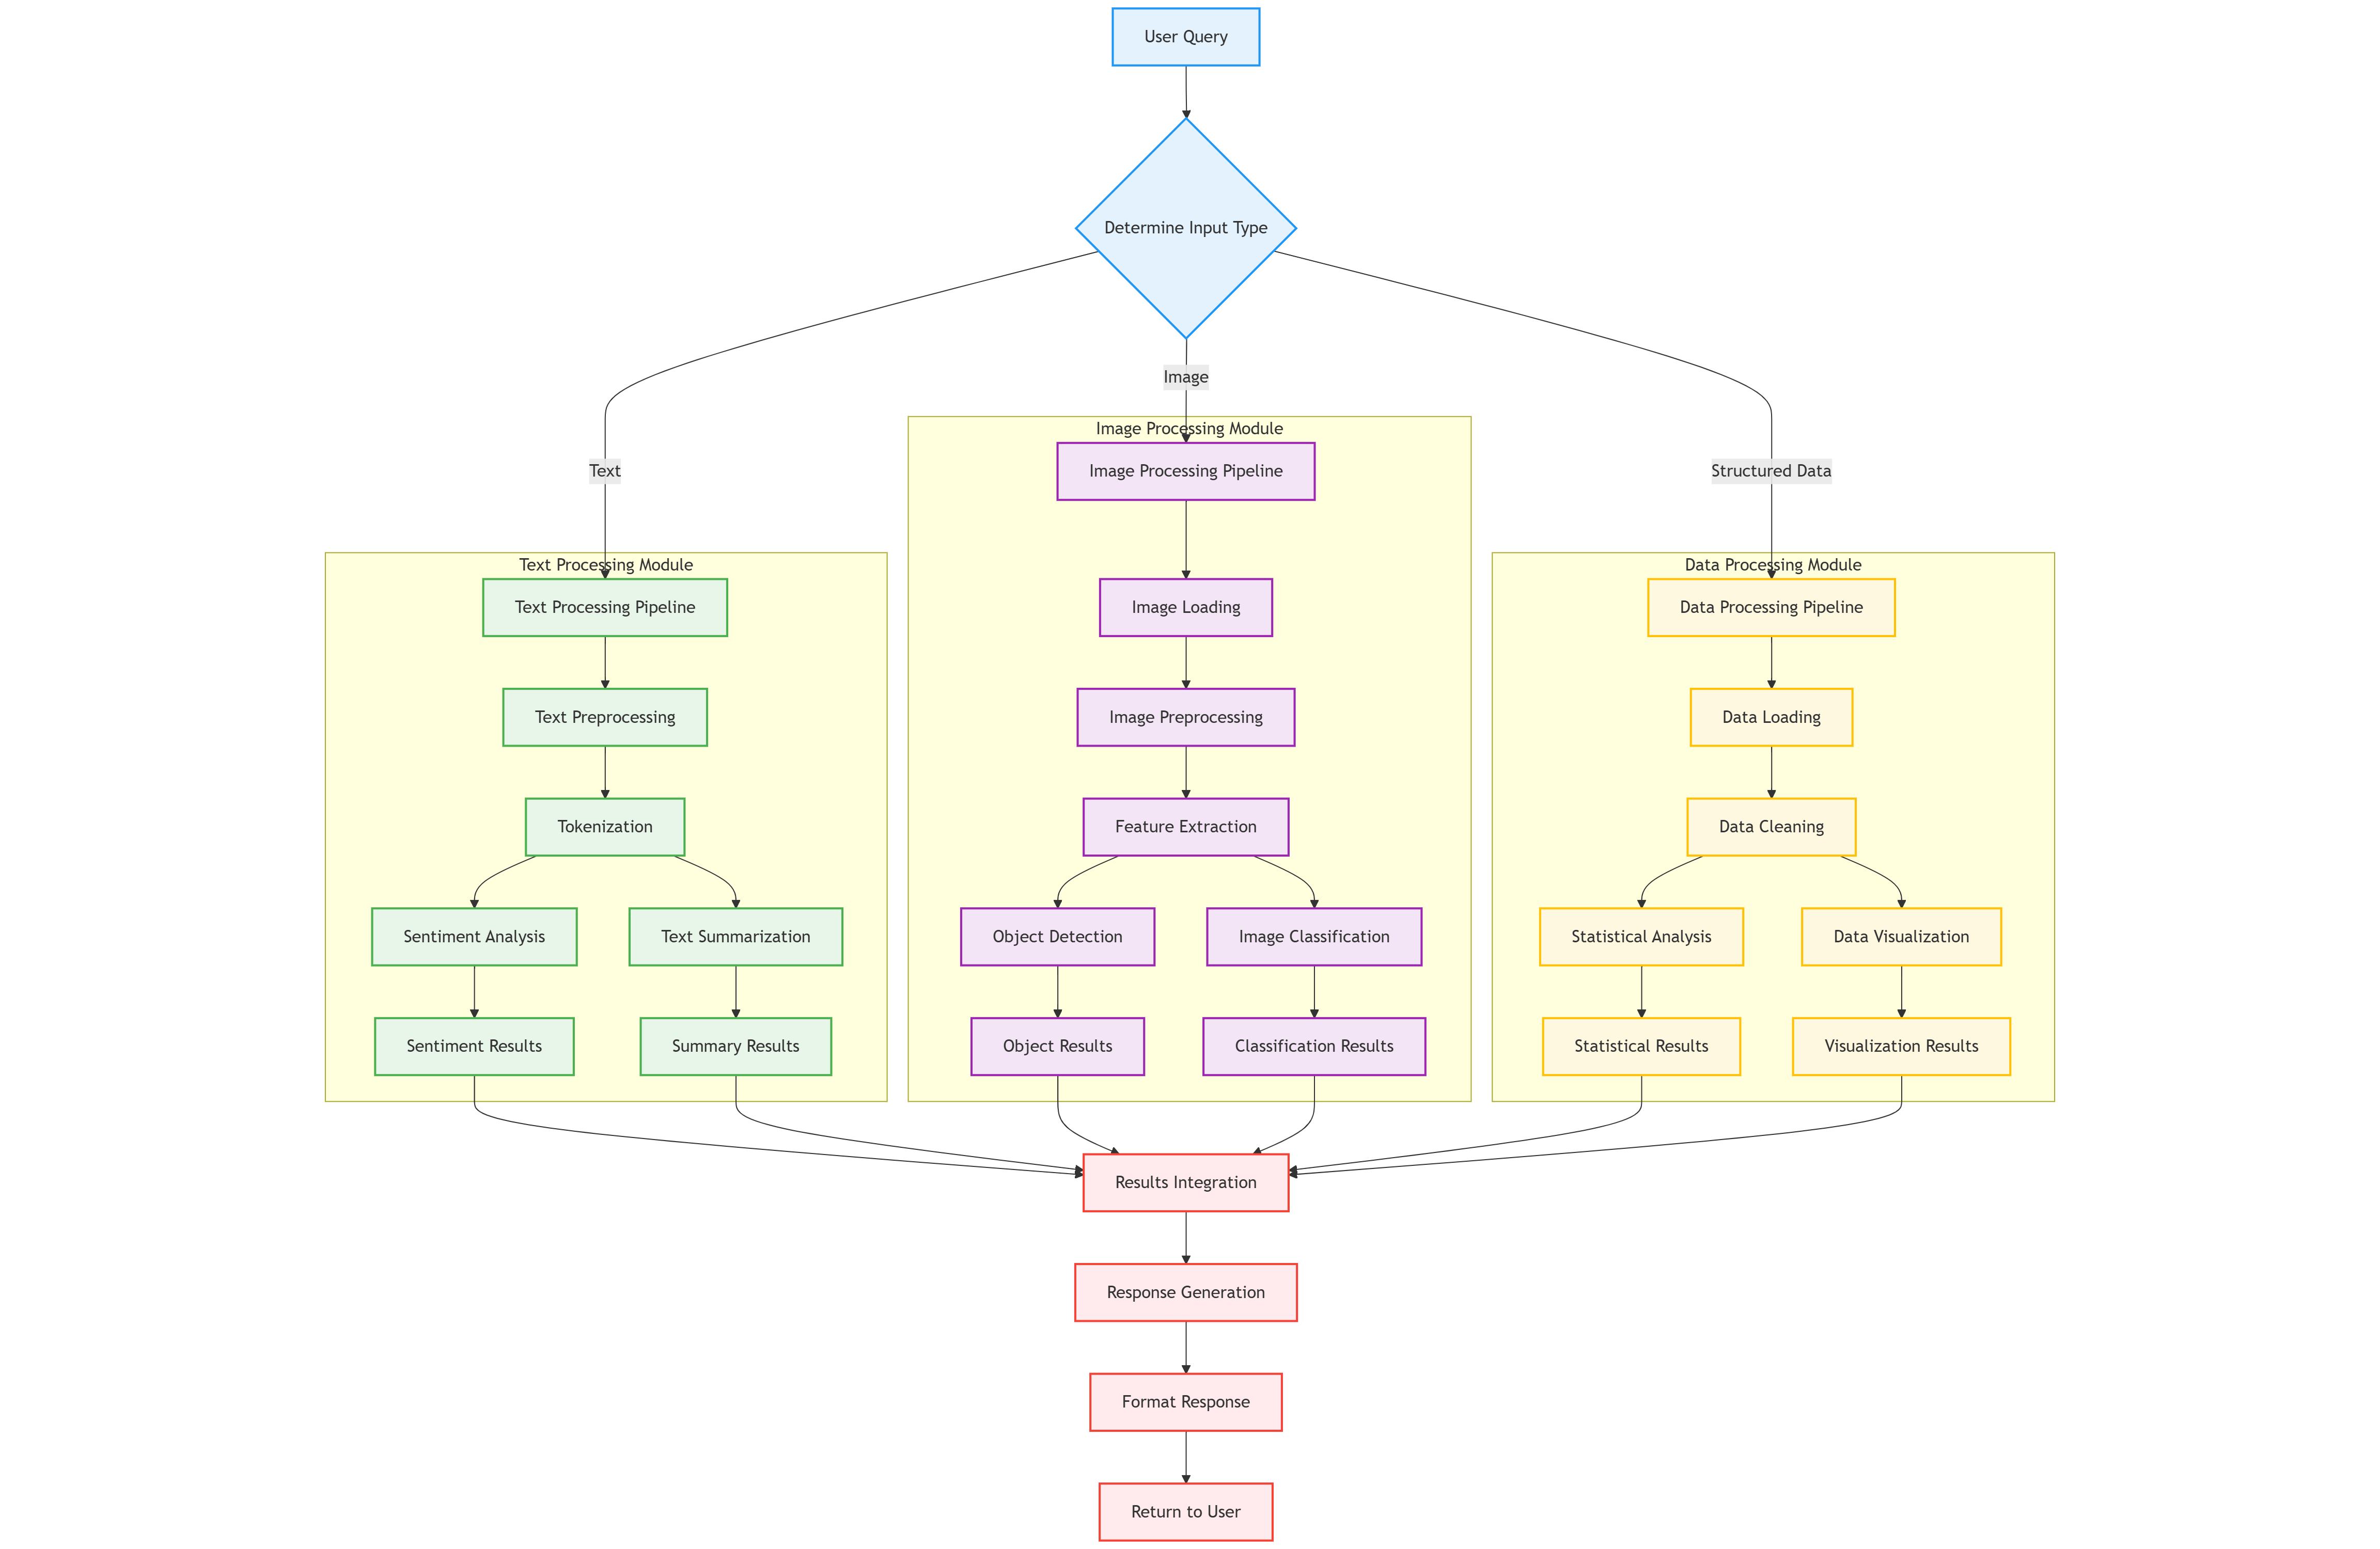

**Set Up Your Environment**

In [12]:
# Install required libraries
!pip install transformers pillow pandas matplotlib

**Text Processing Component**

In [15]:
from transformers import pipeline

# Simple text processing function
def process_text(text_input):
    # Use a pre-trained sentiment analyzer
    sentiment_analyzer = pipeline("sentiment-analysis")
    result = sentiment_analyzer(text_input)

    # Use a pre-trained text summarizer for longer texts
    if len(text_input.split()) > 30:  # If text is long enough
        summarizer = pipeline("summarization")
        summary = summarizer(text_input, max_length=50, min_length=10)[0]['summary_text']
    else:
        summary = text_input

    return {
        "sentiment": result[0],
        "summary": summary
    }

**Image Processing Component**

In [16]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

# Simple image processing function
def process_image(image_path):
    # Load and display image
    img = Image.open(image_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Use a pre-trained image classifier
    image_classifier = pipeline("image-classification")
    result = image_classifier(img)

    return {
        "classifications": result
    }

**Data Analysis Component**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Simple structured data processing function
def process_structured_data(data_path):
    # Load data
    if data_path.endswith('.csv'):
        df = pd.read_csv(data_path)
    elif data_path.endswith('.xlsx'):
        df = pd.read_excel(data_path)
    else:
        return {"error": "Unsupported file format"}

    # Basic data analysis
    data_info = {
        "column_names": list(df.columns),
        "row_count": len(df),
        "data_sample": df.head(5).to_dict(),
        "numerical_summary": df.describe().to_dict() if len(df) > 0 else {},
    }

    # Simple visualization
    if df.select_dtypes(include=['number']).columns.tolist():
        numeric_column = df.select_dtypes(include=['number']).columns[0]
        plt.figure(figsize=(10, 6))
        df[numeric_column].hist()
        plt.title(f'Distribution of {numeric_column}')
        plt.xlabel(numeric_column)
        plt.ylabel('Frequency')
        plt.show()

    return data_info

**Main Assistant Function**

In [18]:
def multi_modal_assistant(input_type, input_content):
    """
    A simple multi-modal assistant that handles text, images, and structured data.

    Parameters:
    - input_type: 'text', 'image', or 'data'
    - input_content: the content to process (text string, image path, or data file path)

    Returns:
    - A dictionary with processed results
    """

    if input_type == 'text':
        print("🔤 Processing text input...")
        return process_text(input_content)

    elif input_type == 'image':
        print("🖼️ Processing image input...")
        return process_image(input_content)

    elif input_type == 'data':
        print("📊 Processing structured data input...")
        return process_structured_data(input_content)

    else:
        return {"error": "Unsupported input type. Please use 'text', 'image', or 'data'."}

**Test Your Assistant**

In [19]:
# Test with text
text_result = multi_modal_assistant('text', "I really enjoyed learning AI through this 30-day challenge. The projects were fascinating and educational!")
print("Text Analysis Result:", text_result)



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


🔤 Processing text input...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Text Analysis Result: {'sentiment': {'label': 'POSITIVE', 'score': 0.9997538924217224}, 'summary': 'I really enjoyed learning AI through this 30-day challenge. The projects were fascinating and educational!'}


Welcome to your Multi-Modal AI Assistant!
This assistant can process text, images, and structured data.

What would you like to process?
1. Text
2. Image
3. Structured Data (CSV/Excel)
4. Exit
Enter your choice (1-4): 2
Please upload an image...


Saving growth-timeline-svg.png to growth-timeline-svg.png
🖼️ Processing image input...


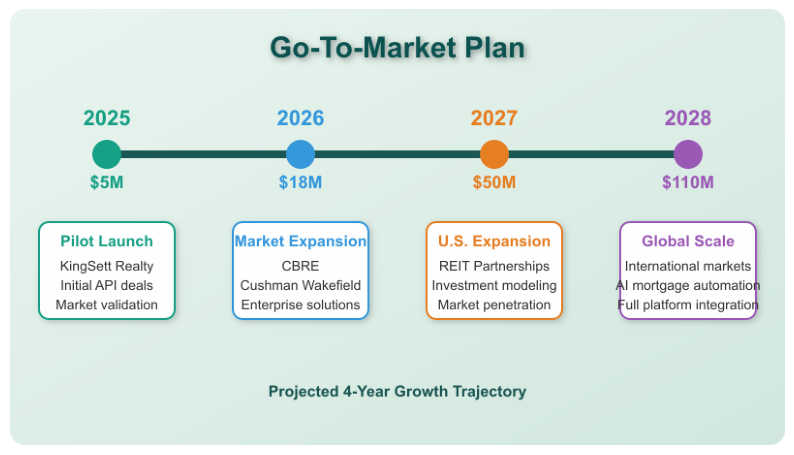

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu



Results:
{
  "classifications": [
    {
      "label": "web site, website, internet site, site",
      "score": 0.9900874495506287
    },
    {
      "label": "analog clock",
      "score": 0.0008890130557119846
    },
    {
      "label": "menu",
      "score": 0.000712289591319859
    },
    {
      "label": "scoreboard",
      "score": 0.00048525736201554537
    },
    {
      "label": "digital clock",
      "score": 0.00048415097990073264
    }
  ]
}

What would you like to process?
1. Text
2. Image
3. Structured Data (CSV/Excel)
4. Exit
Enter your choice (1-4): 3
Please upload a CSV or Excel file...


Saving bookings_data1.csv to bookings_data1.csv
📊 Processing structured data input...


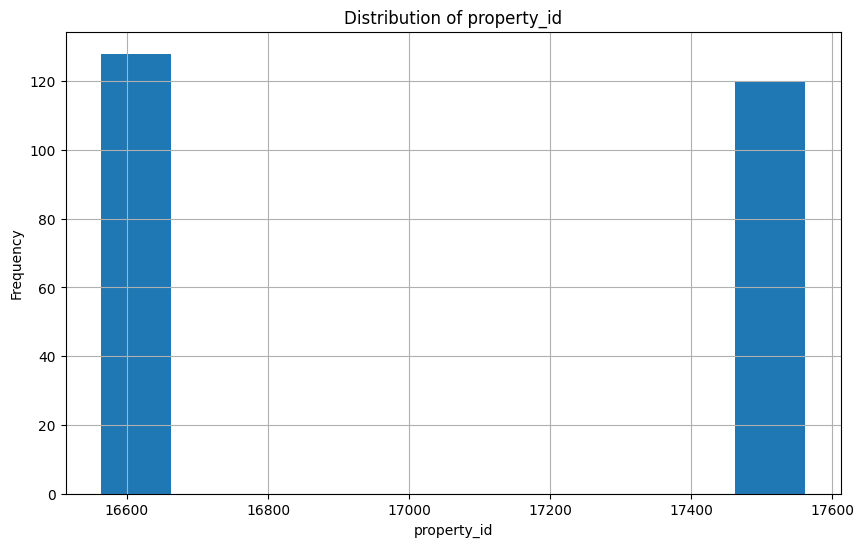


Results:
File analyzed! Here's what I found:
- 248 rows of data
- Columns: date, month_name, property_id, property_name, property_type...

What would you like to process?
1. Text
2. Image
3. Structured Data (CSV/Excel)
4. Exit
Enter your choice (1-4): 1
Enter the text you'd like to analyze: hello this is my first and last project


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


🔤 Processing text input...


Device set to use cpu



Results:
{
  "sentiment": {
    "label": "POSITIVE",
    "score": 0.9993759989738464
  },
  "summary": "hello this is my first and last project"
}

What would you like to process?
1. Text
2. Image
3. Structured Data (CSV/Excel)
4. Exit
Enter your choice (1-4): 4
Thank you for using the Multi-Modal AI Assistant!


In [23]:
from IPython.display import display, HTML
import json

def create_demo():
    print("Welcome to your Multi-Modal AI Assistant!")
    print("=======================================")
    print("This assistant can process text, images, and structured data.")

    while True:
        print("\nWhat would you like to process?")
        print("1. Text")
        print("2. Image")
        print("3. Structured Data (CSV/Excel)")
        print("4. Exit")

        choice = input("Enter your choice (1-4): ")

        if choice == '1':
            text_input = input("Enter the text you'd like to analyze: ")
            result = multi_modal_assistant('text', text_input)
            print("\nResults:")
            print(json.dumps(result, indent=2))

        elif choice == '2':
            print("Please upload an image...")
            from google.colab import files
            uploaded = files.upload()
            if uploaded:
                image_path = list(uploaded.keys())[0]
                result = multi_modal_assistant('image', image_path)
                print("\nResults:")
                print(json.dumps(result, indent=2))

        elif choice == '3':
            print("Please upload a CSV or Excel file...")
            from google.colab import files
            uploaded = files.upload()
            if uploaded:
                data_path = list(uploaded.keys())[0]
                result = multi_modal_assistant('data', data_path)
                print("\nResults:")
                print("File analyzed! Here's what I found:")
                print(f"- {result['row_count']} rows of data")
                print(f"- Columns: {', '.join(result['column_names'][:5])}{'...' if len(result['column_names']) > 5 else ''}")

        elif choice == '4':
            print("Thank you for using the Multi-Modal AI Assistant!")
            break

        else:
            print("Invalid choice. Please try again.")

# Run the demo
create_demo()